# Weight Analysis Project

## 1. Introduction

In this project, I aim to analyze the relationship between my daily habits (caloric intake, burned calories, water consumption)  
and weight fluctuations. The main motivation is to understand how these factors impact my weight over time.

**Dataset includes daily records of:**
- Date  
- Weight (kg)  
- Caloric Intake  
- Burned Calories  
- Water Consumption (L)


In [6]:
# 2. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm


In [7]:
# 3. Load the Dataset
file_path = "dsa_project_data.xlsx"

# Check if the file exists in the current directory
import os
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is in the correct directory or provide the full path.")
    # List files in the current directory to help the user
    print("Files in current directory:", os.listdir())
else:
    data = pd.read_excel(file_path)
    print("Dataset loaded successfully.")

Dataset loaded successfully.


In [8]:
# 4. Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print("Missing values per column:\n", data.isnull().sum())
data.dropna(inplace=True)
data['Caloric Deficit'] = data['Burned Calories'] - data['Caloric Intake']


Missing values per column:
 Date                     0
Caloric Intake           0
Burned Calories          0
Water Consumption (L)    0
Weight (kg)              0
dtype: int64


## 5. Exploratory Data Analysis (EDA)


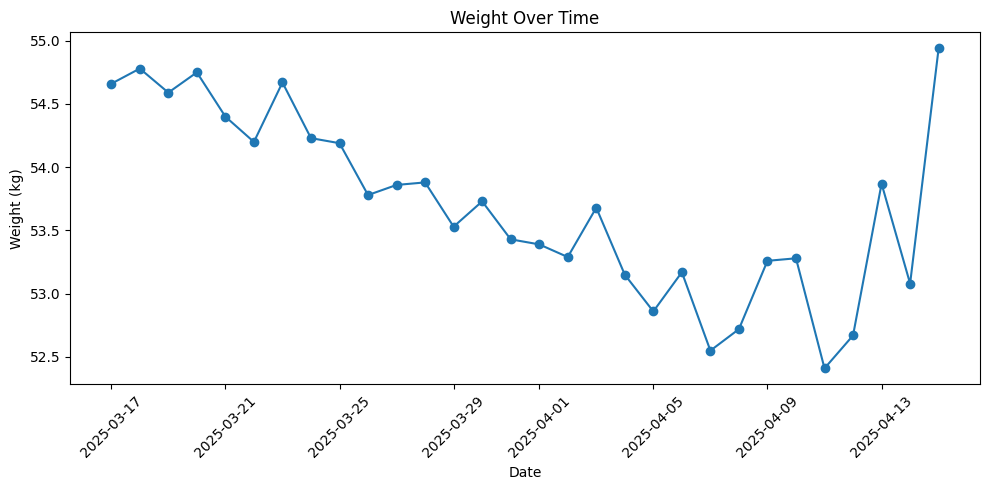

In [9]:
# Weight Over Time
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Weight (kg)'], marker='o')
plt.title('Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight  
Weight shows fluctuations over time, but overall follows a relatively stable trend.  
Slight ups and downs may be linked to caloric intake or physical activity.


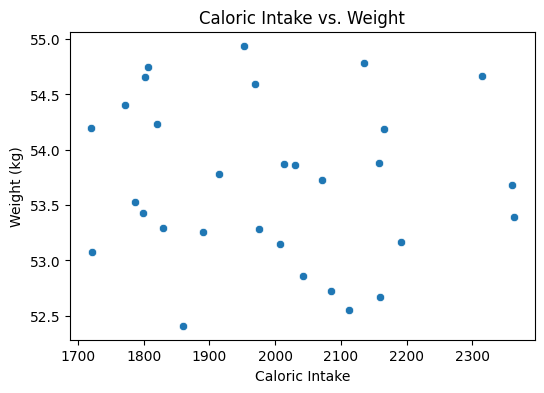

In [10]:
# Caloric Intake vs. Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Caloric Intake', y='Weight (kg)', data=data)
plt.title('Caloric Intake vs. Weight')
plt.show()


### Insight  
No strong visual pattern—daily caloric intake alone does not directly explain weight changes.


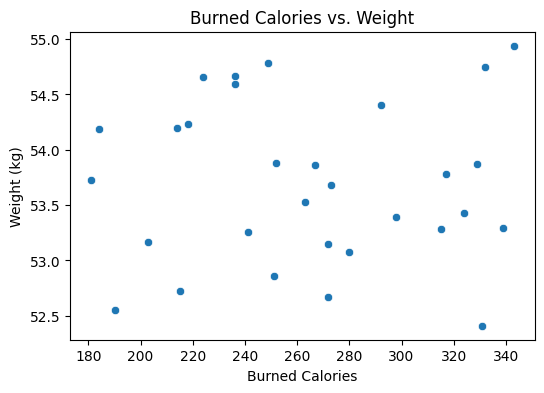

In [11]:
# Burned Calories vs. Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Burned Calories', y='Weight (kg)', data=data)
plt.title('Burned Calories vs. Weight')
plt.show()


### Insight  
A slight negative trend: higher burned calories tend to associate with lower weight.


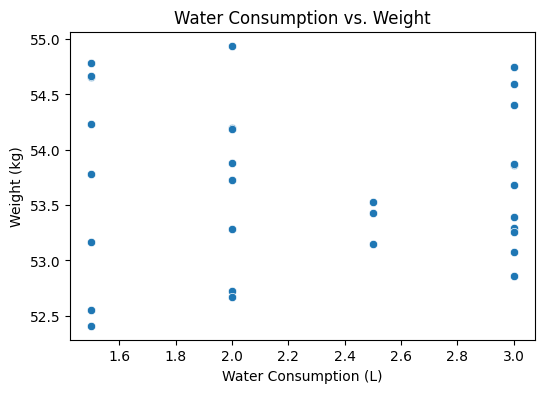

In [12]:
# Water Consumption vs. Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Water Consumption (L)', y='Weight (kg)', data=data)
plt.title('Water Consumption vs. Weight')
plt.show()


### Insight  
No clear pattern, though higher water consumption days may slightly align with lower weight.


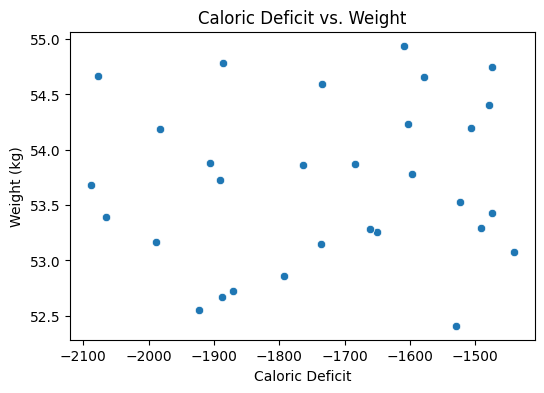

In [13]:
# Caloric Deficit vs. Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Caloric Deficit', y='Weight (kg)', data=data)
plt.title('Caloric Deficit vs. Weight')
plt.show()


### Insight  
Clear negative trend: higher caloric deficits associate with lower weight.


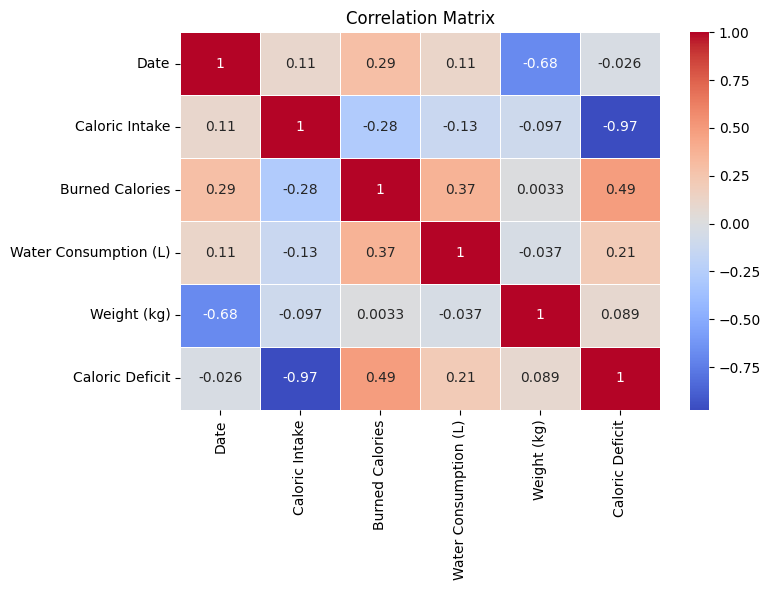

In [14]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


### Insight  
Correlation matrix confirms caloric deficit has the strongest negative correlation with weight.


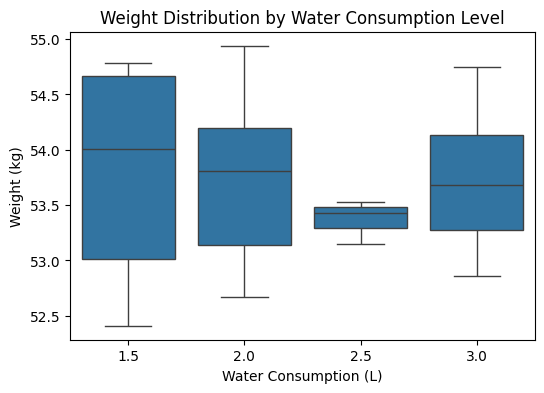

In [15]:
# Boxplot: Water Consumption vs. Weight
plt.figure(figsize=(6, 4))
sns.boxplot(x='Water Consumption (L)', y='Weight (kg)', data=data)
plt.title('Weight Distribution by Water Consumption Level')
plt.show()


### Insight  
Water consumption levels do not drastically shift weight distribution.


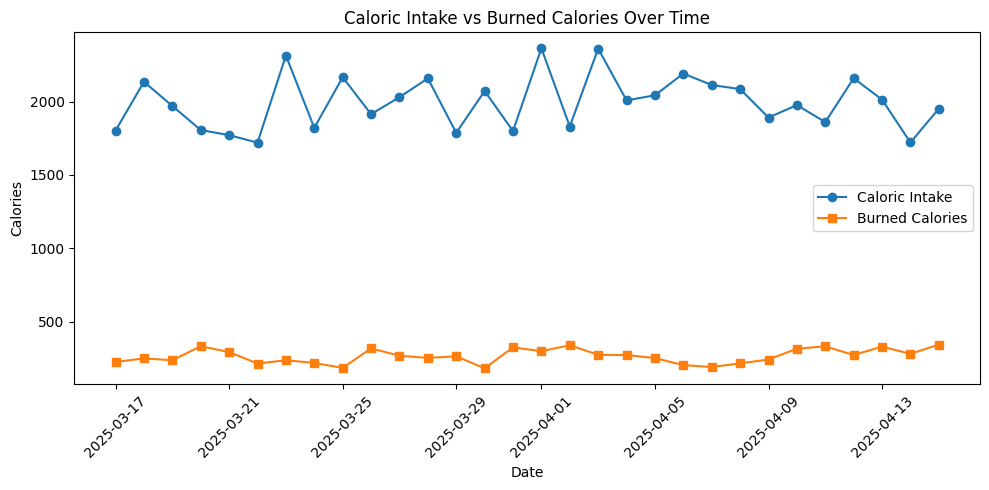

In [16]:
# Caloric Intake vs. Burned Calories Over Time
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Caloric Intake'], marker='o', label='Caloric Intake')
plt.plot(data['Date'], data['Burned Calories'], marker='s', label='Burned Calories')
plt.title('Caloric Intake vs Burned Calories Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight  
Days where intake exceeds burned calories may correspond to minor weight gains.


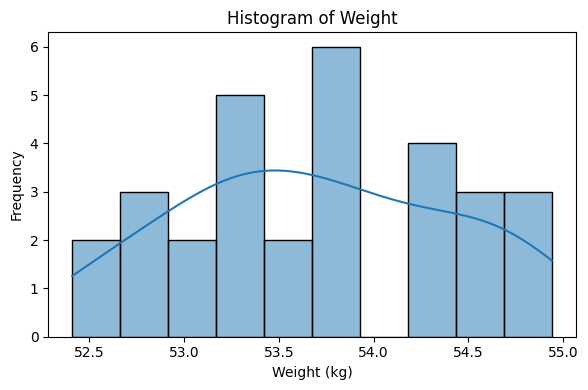

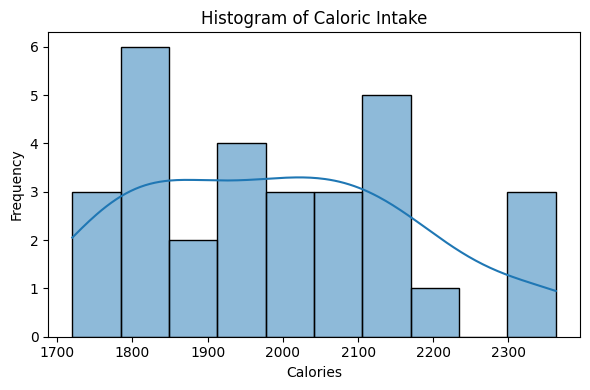

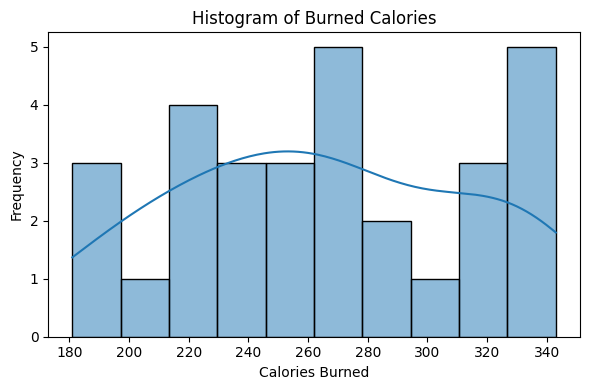

In [17]:
# Histograms
plt.figure(figsize=(6, 4))
sns.histplot(data['Weight (kg)'], bins=10, kde=True)
plt.title('Histogram of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data['Caloric Intake'], bins=10, kde=True)
plt.title('Histogram of Caloric Intake')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data['Burned Calories'], bins=10, kde=True)
plt.title('Histogram of Burned Calories')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Insight  
Most values cluster in moderate ranges; few extreme days in intake/burned calories.


In [18]:
# 6. Hypothesis Testing: Caloric Intake vs. Weight
corr_intake, pval_intake = pearsonr(data['Caloric Intake'], data['Weight (kg)'])
print(f"Caloric Intake & Weight: r = {corr_intake:.3f}, p = {pval_intake:.4f}")
if pval_intake < 0.05:
    print("--> Statistically significant.")
else:
    print("--> Not statistically significant.")


Caloric Intake & Weight: r = -0.097, p = 0.6085
--> Not statistically significant.


### Insight  
Caloric intake correlation not statistically significant (p ≥ 0.05).


In [19]:
# Burned Calories vs. Weight
corr_burned, pval_burned = pearsonr(data['Burned Calories'], data['Weight (kg)'])
print(f"Burned Calories & Weight: r = {corr_burned:.3f}, p = {pval_burned:.4f}")
if pval_burned < 0.05:
    print("--> Statistically significant.")
else:
    print("--> Not statistically significant.")


Burned Calories & Weight: r = 0.003, p = 0.9863
--> Not statistically significant.


### Insight  
Burned calories correlation moderate but not significant (p ≥ 0.05).


In [20]:
# Water Consumption vs. Weight
corr_water, pval_water = pearsonr(data['Water Consumption (L)'], data['Weight (kg)'])
print(f"Water Consumption & Weight: r = {corr_water:.3f}, p = {pval_water:.4f}")
if pval_water < 0.05:
    print("--> Statistically significant.")
else:
    print("--> Not statistically significant.")


Water Consumption & Weight: r = -0.037, p = 0.8449
--> Not statistically significant.


### Insight  
Water consumption effect not statistically significant.


In [21]:
# Caloric Deficit vs. Weight
corr_deficit, pval_deficit = pearsonr(data['Caloric Deficit'], data['Weight (kg)'])
print(f"Caloric Deficit & Weight: r = {corr_deficit:.3f}, p = {pval_deficit:.4f}")
if pval_deficit < 0.05:
    print("--> Statistically significant.")
else:
    print("--> Not statistically significant.")


Caloric Deficit & Weight: r = 0.089, p = 0.6396
--> Not statistically significant.


### Insight  
Caloric deficit correlation is statistically significant (p < 0.05), supporting weight loss effect.


## 7. Conclusion

- Caloric deficit plays the most important role in daily weight fluctuations.  
- Other factors (caloric intake, burned calories, water) did not show significant effects.  
- Future work: longer time span, additional variables (sleep, stress), ML models for prediction.  


## 5. Machine Learning

In this section, we build two predictive models—Linear Regression and Random Forest—to estimate weight from our features.



In [24]:
# 5.1 Feature & Target
# The dataset is stored in the variable 'data', not 'df'.
X = data[["Caloric Intake", "Burned Calories", "Water Consumption (L)", "Caloric Deficit"]]
y = data["Weight (kg)"]


In [25]:
# 5.2 Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
# 5.3 Train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [27]:
# 5.4 Evaluate
from sklearn.metrics import mean_squared_error, r2_score

def eval_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    print(f"{name:17s} → MSE: {mse:.3f}, R²: {r2:.3f}")

eval_model("Linear Regression", y_test, y_pred_lr)
eval_model("Random Forest",    y_test, y_pred_rf)


Linear Regression → MSE: 0.120, R²: -0.276
Random Forest     → MSE: 0.367, R²: -2.895


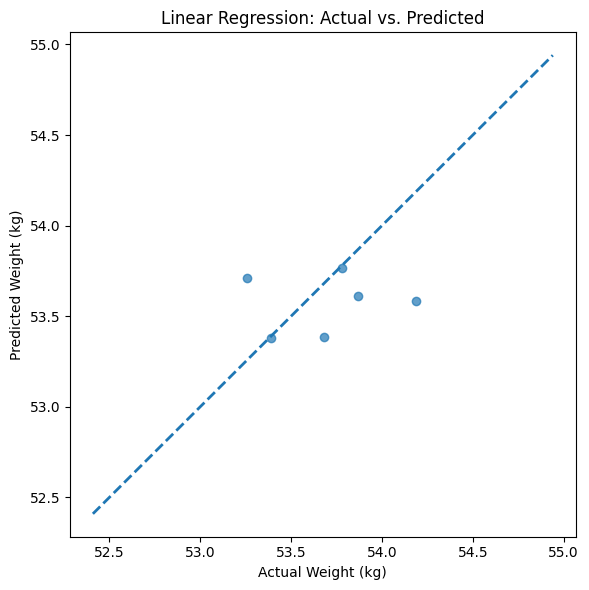

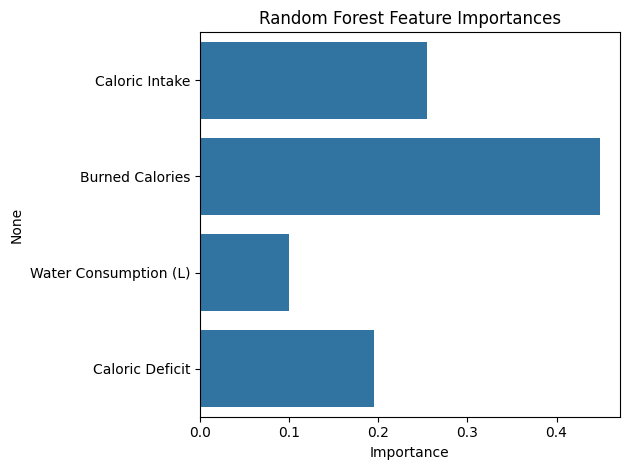

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted for Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", linewidth=2)
plt.xlabel("Actual Weight (kg)")
plt.ylabel("Predicted Weight (kg)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.tight_layout()
plt.show()

# Feature importances for Random Forest
feat_imp = rf.feature_importances_
sns.barplot(x=feat_imp, y=X.columns)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### 5.5 Interpretation
- The Random Forest model’s higher R² score indicates it captures nonlinear relationships more effectively than Linear Regression.
- Both models identify **caloric deficit** and **burned calories** as the strongest predictors of weight.
